In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Todo: Specify evaluation scenario
scenario = "creditrisk" # diabetes or creditrisk

if scenario == "creditrisk":
    original = pd.read_csv("S2HomeCreditDefaultRiskDNN/TrueScore/credit_risk.csv")
    synDSmust = pd.read_csv("S2HomeCreditDefaultRiskDNN/AdvancedScoreMUST/synDS_must.csv")
    synDSmay = pd.read_csv("S2HomeCreditDefaultRiskDNN/AdvancedScoreMAY/synDS_may.csv")
elif scenario == "diabetes":
    original = pd.read_csv("S1DiabetesPredictionRF/TrueScore/diabetes_prediction_dataset.csv")
    synDSmust = pd.read_csv("S1DiabetesPredictionRF/AdvancedScoreMUST/synDS_must.csv")
    synDSmay = pd.read_csv("S1DiabetesPredictionRF/AdvancedScoreMAY/synDS_may.csv")
else:
    raise AssertionError("Check specifications: Evaluation scenario does not exist")

In [3]:
feature_names = original.columns
feature_names

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'TARGET'],
      dtype='object')

In [4]:
# Todo: Specify column of interest from the above listed feature names
column_of_interest = "AMT_CREDIT"

# columns
c_original = original[column_of_interest]
c_must = synDSmust[column_of_interest]
c_may = synDSmay[column_of_interest]

# statistics
s_original = c_original.agg(["min", "max", "mean", "median", "std", "skew"]).rename("original")
s_must = c_must.agg(["min", "max", "mean", "median", "std", "skew"]).rename("must")
s_may = c_may.agg(["min", "max", "mean", "median", "std", "skew"]).rename("may")
compare = pd.concat([s_original,s_must,s_may],axis=1)

In [6]:
compare

,original,must,may
min,4.500000e+04,4.500000e+04,4.500000e+04
max,4.050000e+06,4.050000e+06,2.298464e+06
mean,5.990258e+05,2.047500e+06,9.092869e+05
median,5.135310e+05,2.047500e+06,8.333544e+05
std,4.024921e+05,1.266494e+06,5.619299e+05
skew,1.234776e+00,1.303463e-17,1.103983e+00


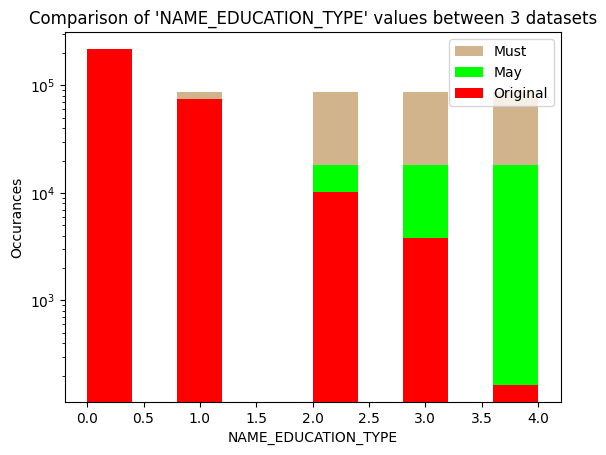

In [57]:
# Plot the distribution of any desired feature for all three datasets
plt.hist(c_must, color="tan", label="Must")
plt.hist(c_may, color="lime", label="May")
plt.hist(c_original, color="red", label="Original")
plt.title(f"Comparison of '{column_of_interest}' values between 3 datasets")
plt.xlabel(f"{column_of_interest}")
plt.ylabel("Occurances")
plt.yscale("log")
plt.legend(prop={'size': 10})
plt.show()